0.95
Early stopping at epoch 147


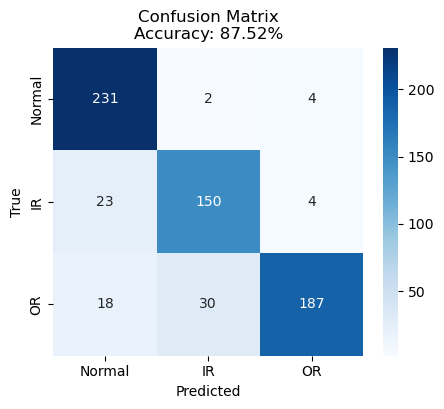

 - Model accuracy: 87.52%


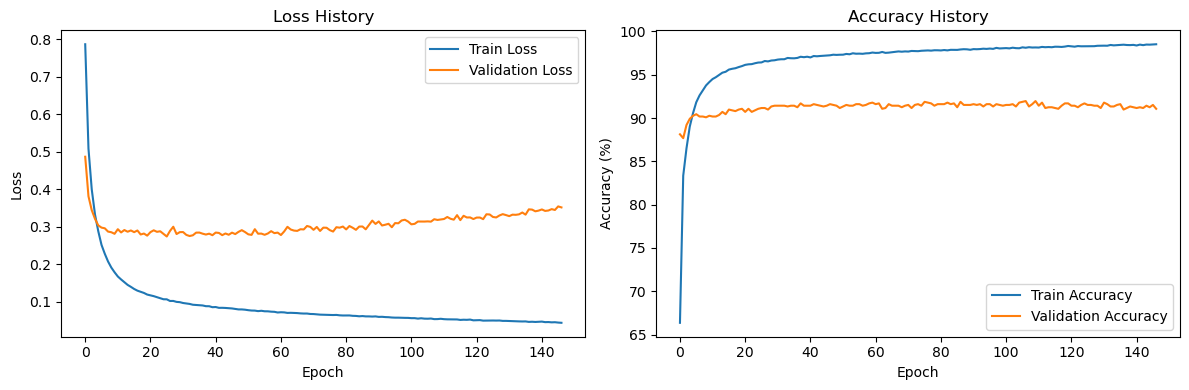

0.95
Early stopping at epoch 124


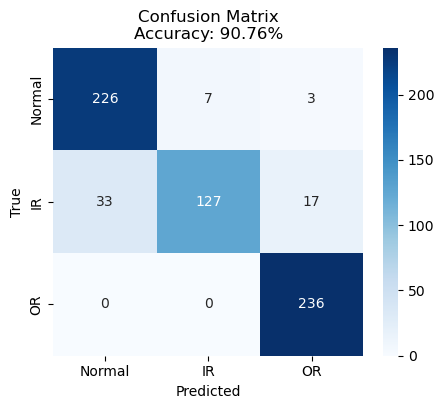

 - Model accuracy: 90.76%


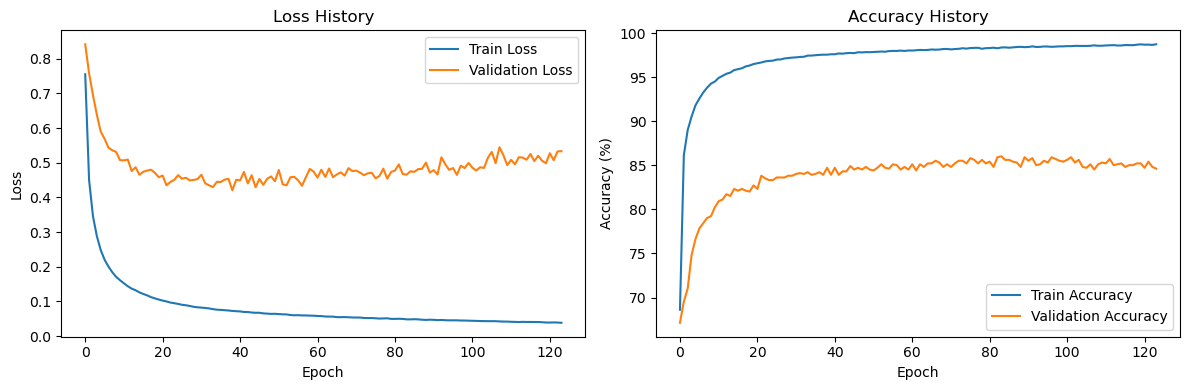

0.95
Early stopping at epoch 81


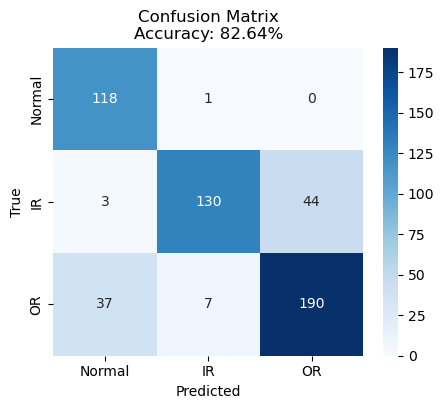

 - Model accuracy: 82.64%


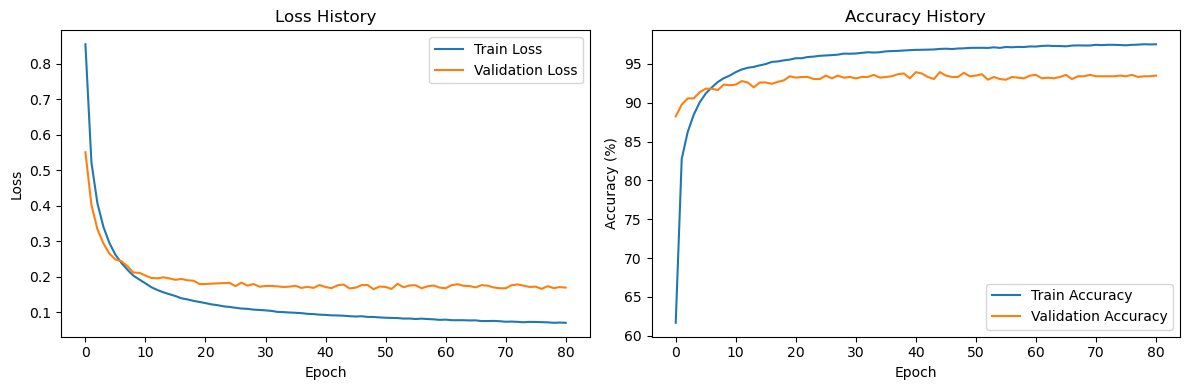

0.95
Early stopping at epoch 86


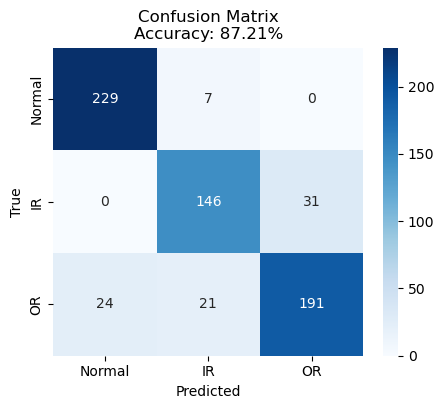

 - Model accuracy: 87.21%


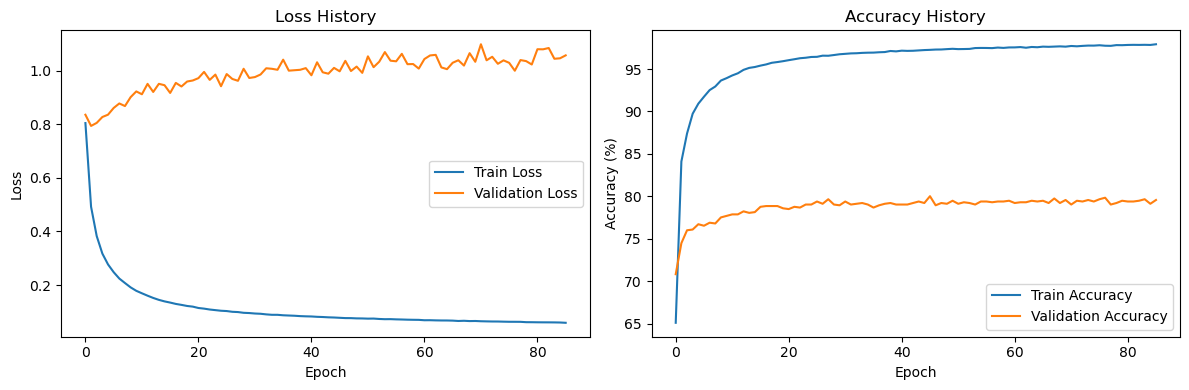

0.95
Early stopping at epoch 146


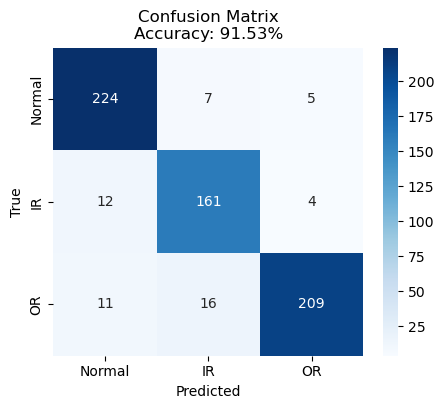

 - Model accuracy: 91.53%


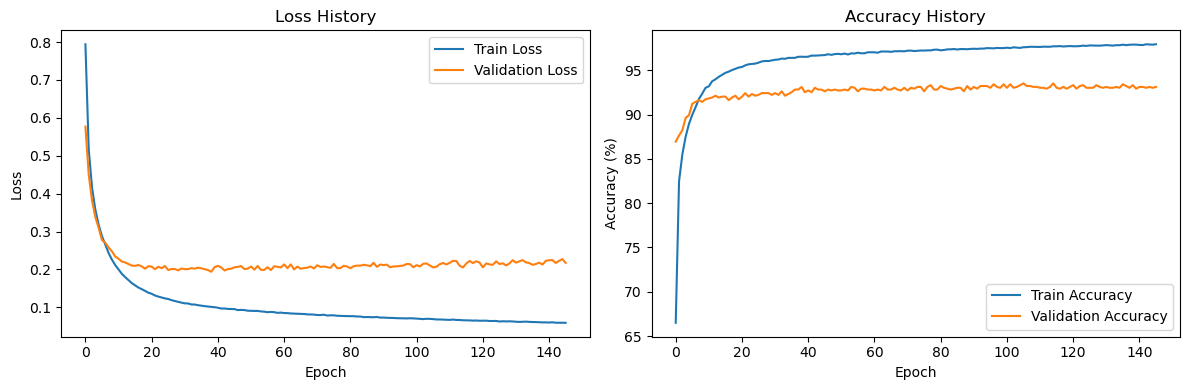

0.95
Early stopping at epoch 118


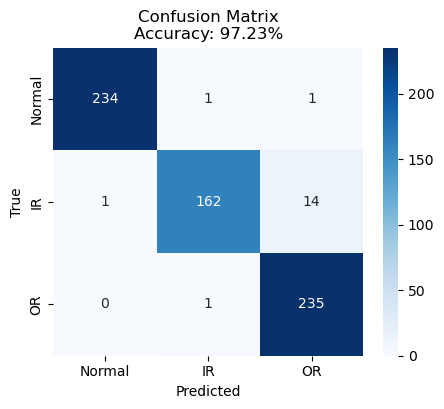

 - Model accuracy: 97.23%


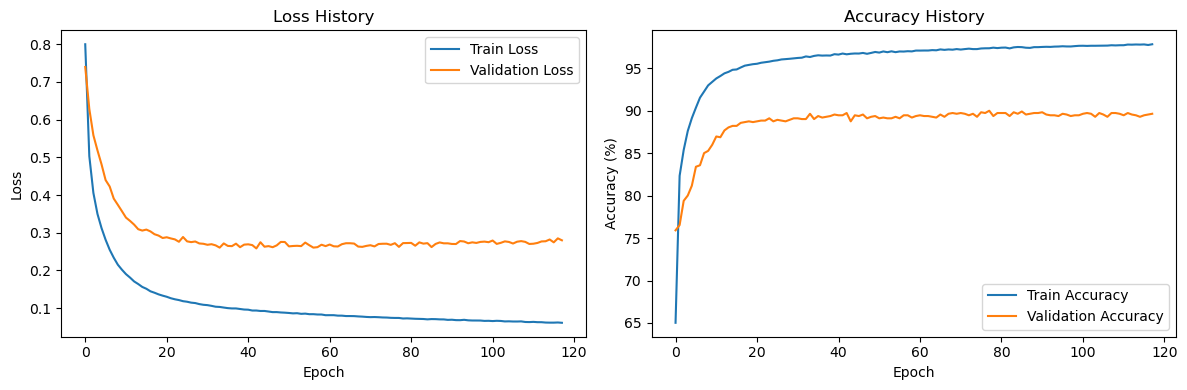

0.95
Early stopping at epoch 257


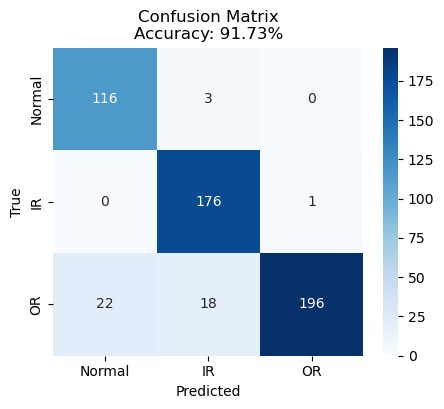

 - Model accuracy: 91.73%


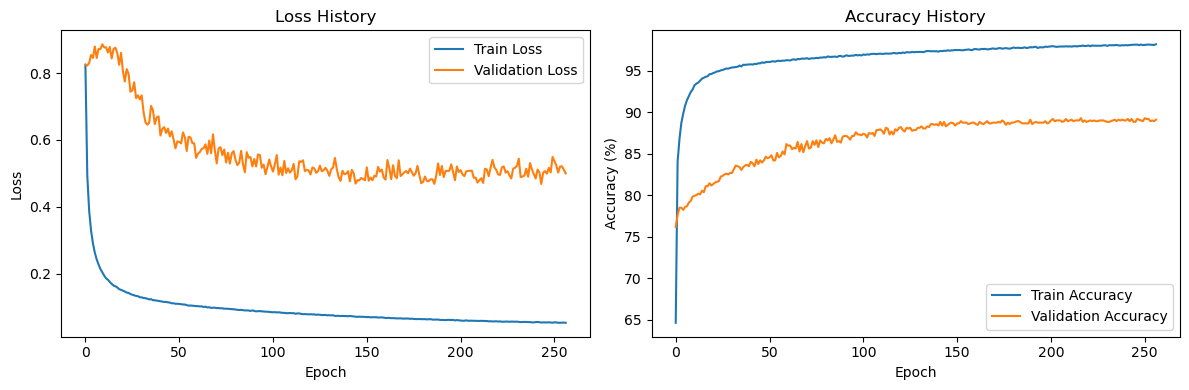

0.95
Early stopping at epoch 142


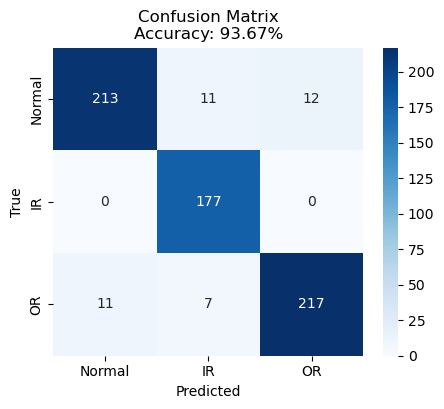

 - Model accuracy: 93.67%


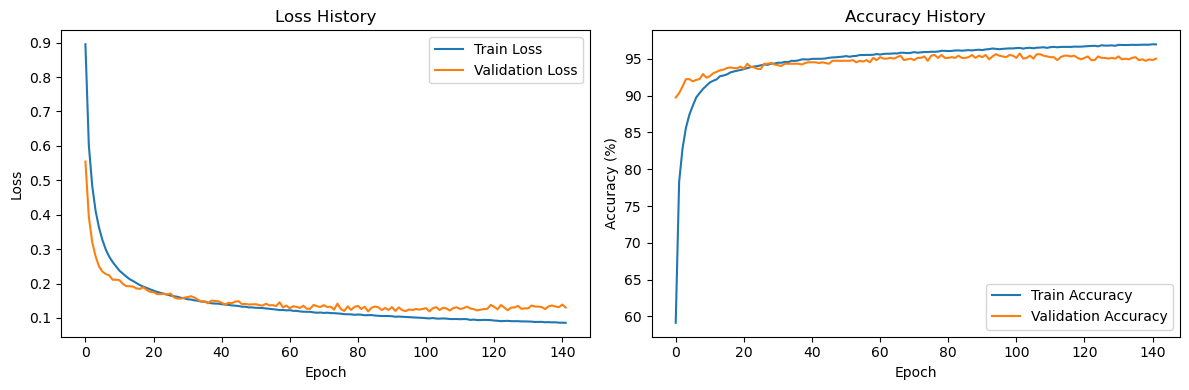

0.95
Early stopping at epoch 206


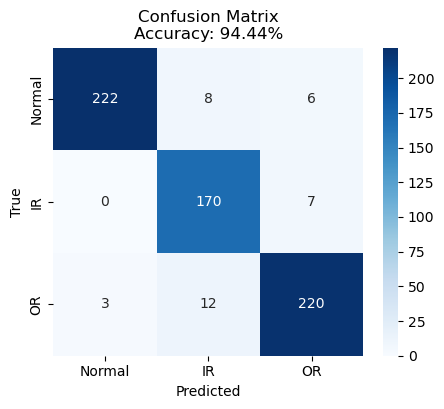

 - Model accuracy: 94.44%


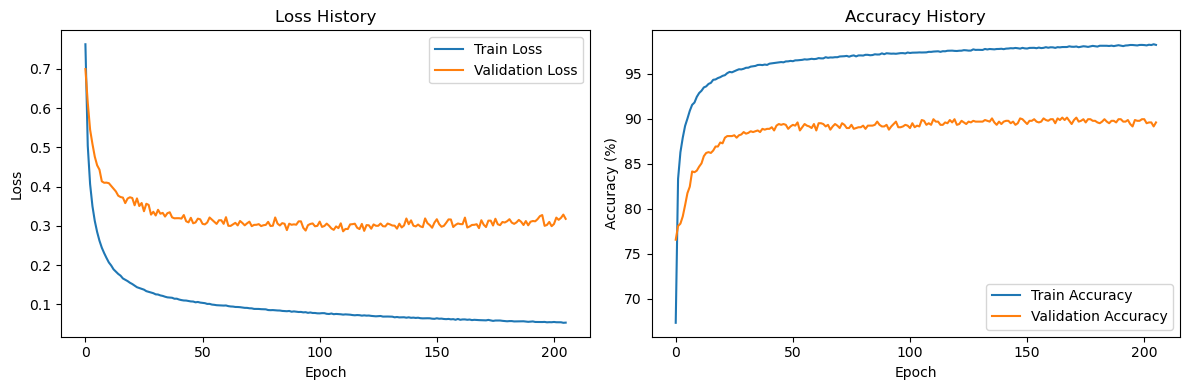

0.95
Early stopping at epoch 81


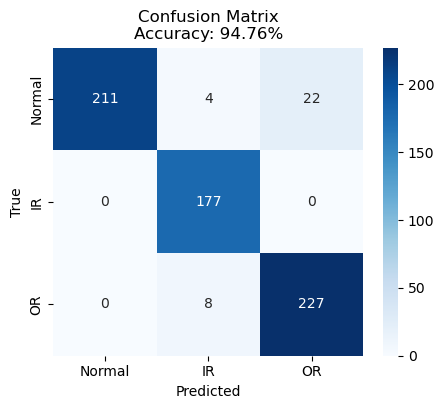

 - Model accuracy: 94.76%


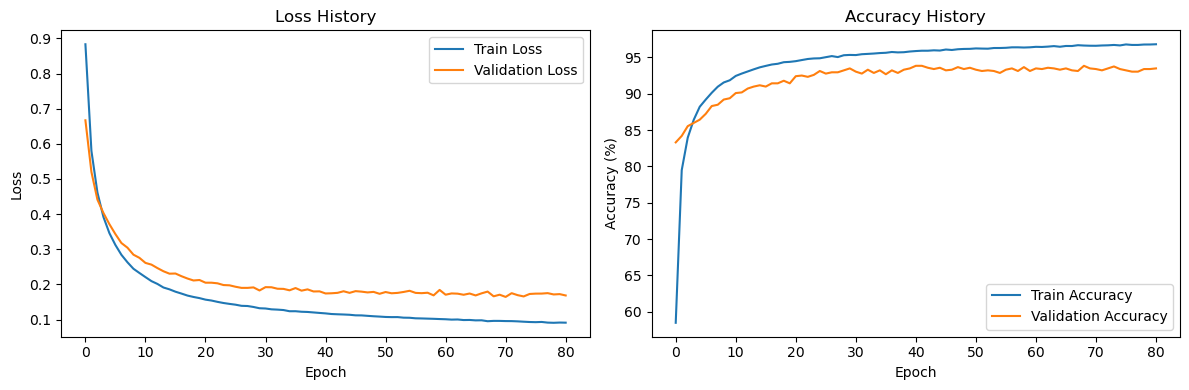

0.95
Early stopping at epoch 83


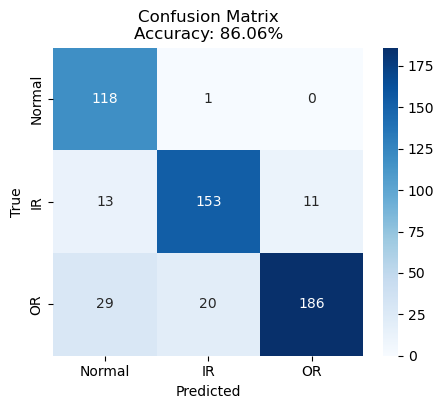

 - Model accuracy: 86.06%


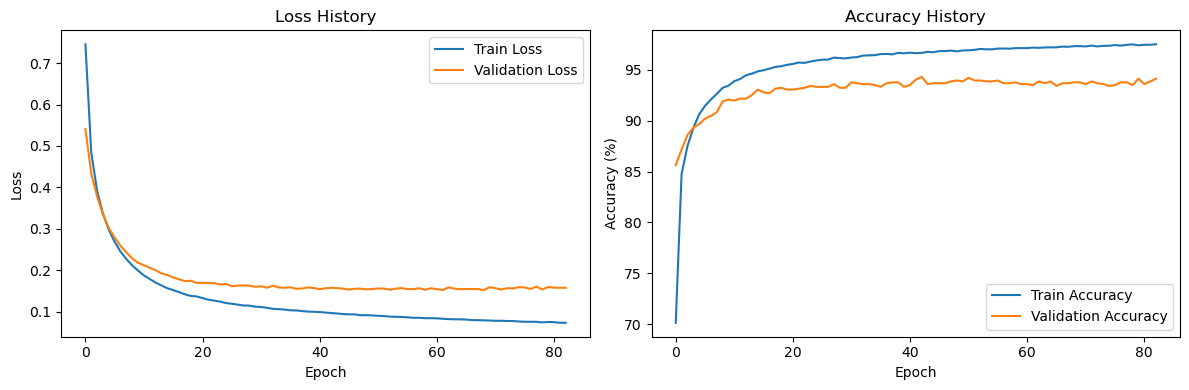

0.95
Early stopping at epoch 81


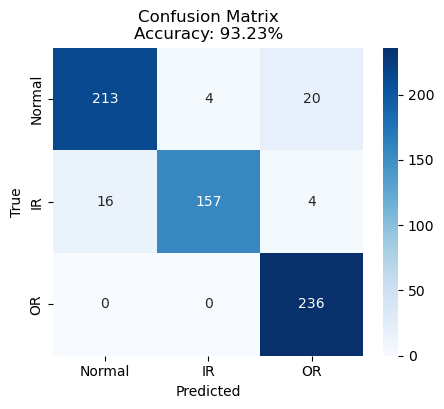

 - Model accuracy: 93.23%


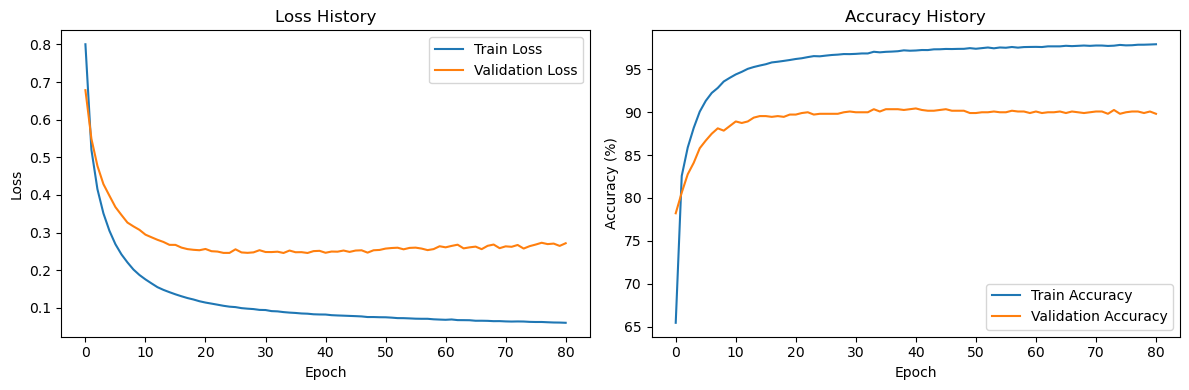

0.95
Early stopping at epoch 157


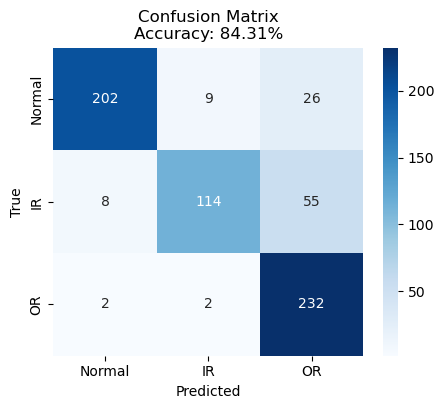

 - Model accuracy: 84.31%


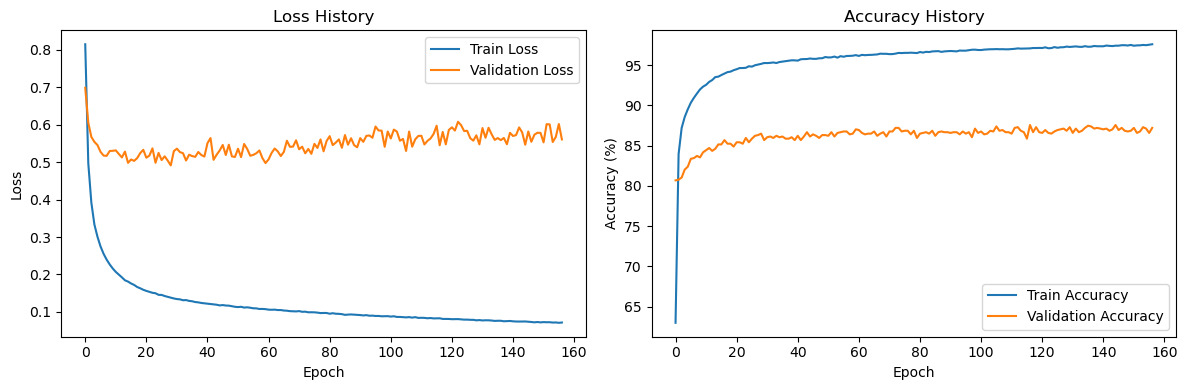

0.95
Early stopping at epoch 109


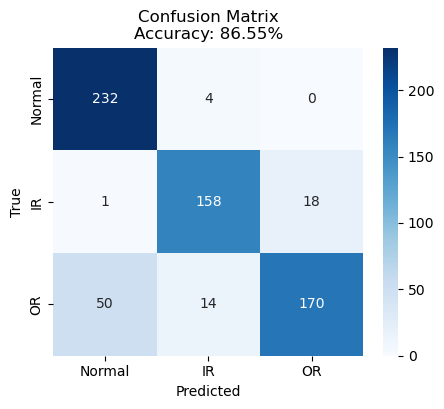

 - Model accuracy: 86.55%


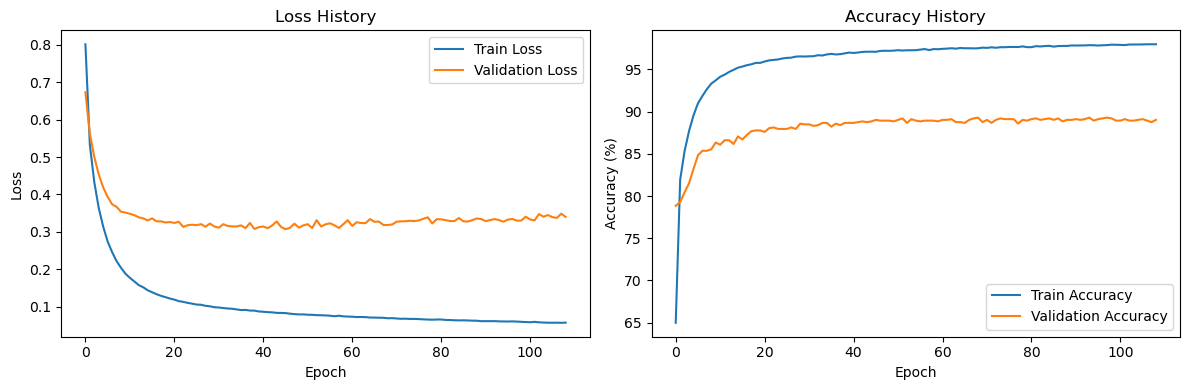

0.95
Early stopping at epoch 111


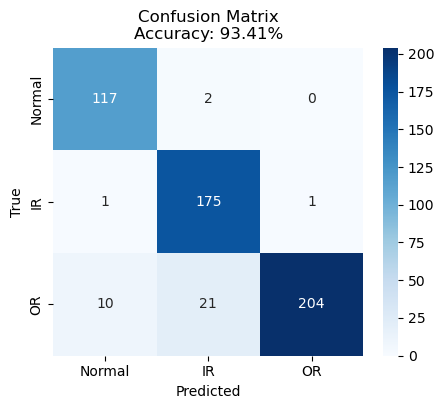

 - Model accuracy: 93.41%


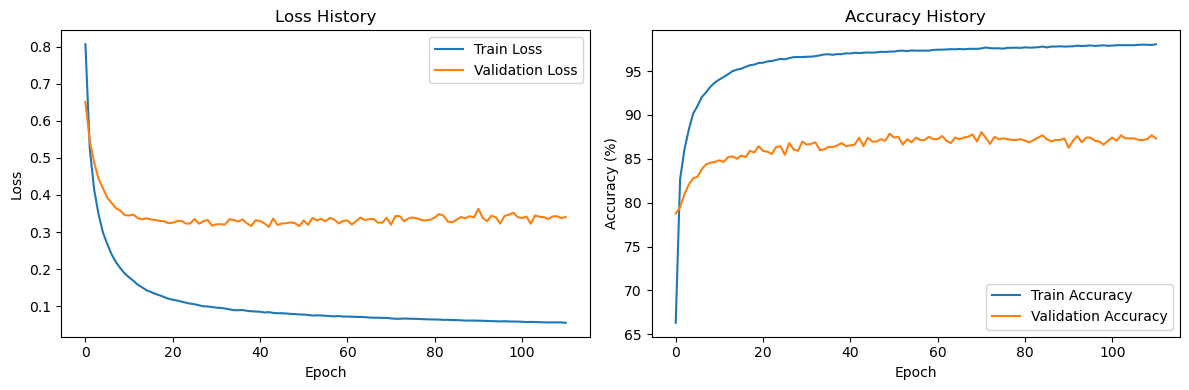

0.95
Early stopping at epoch 179


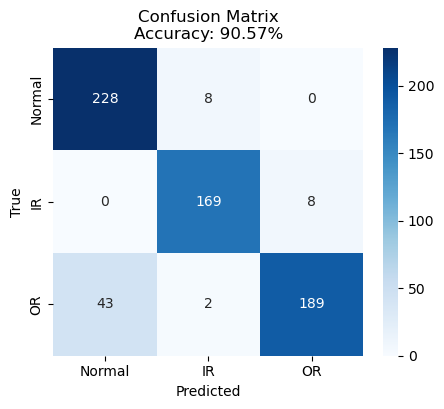

 - Model accuracy: 90.57%


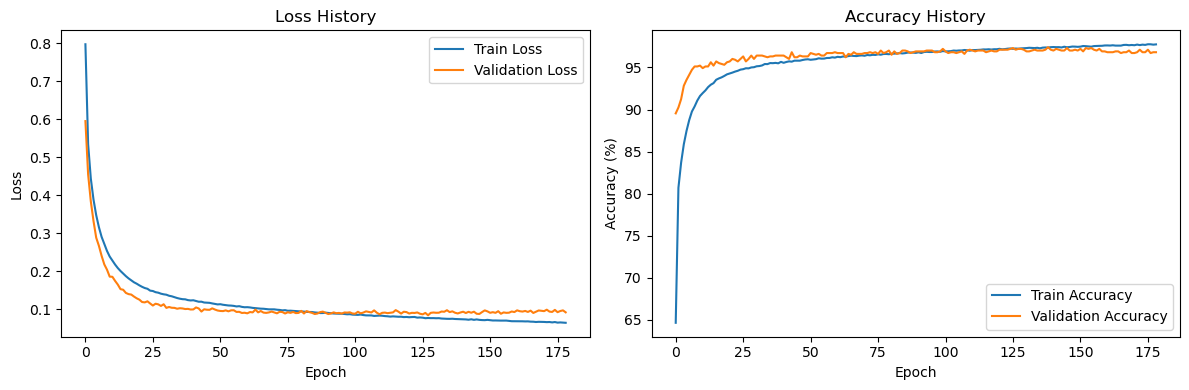

0.95
Early stopping at epoch 136


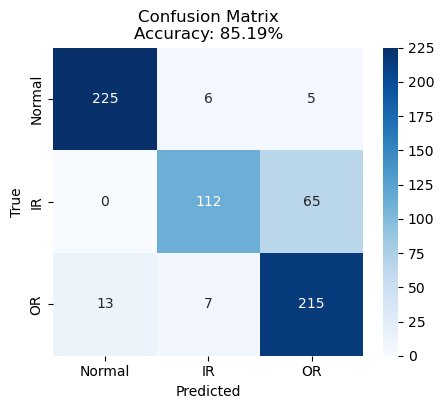

 - Model accuracy: 85.19%


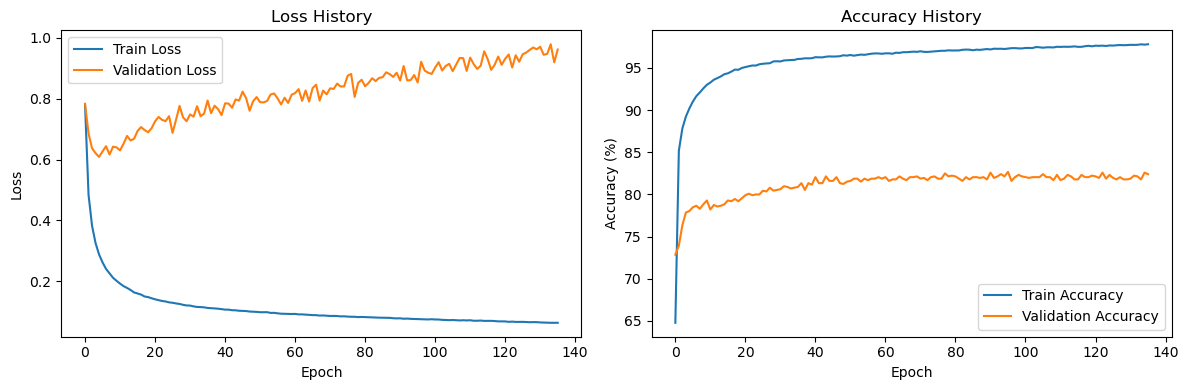

0.95
Early stopping at epoch 103


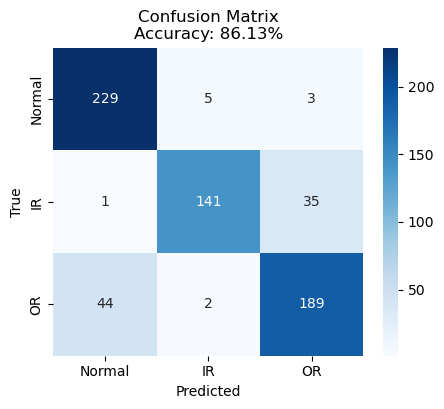

 - Model accuracy: 86.13%


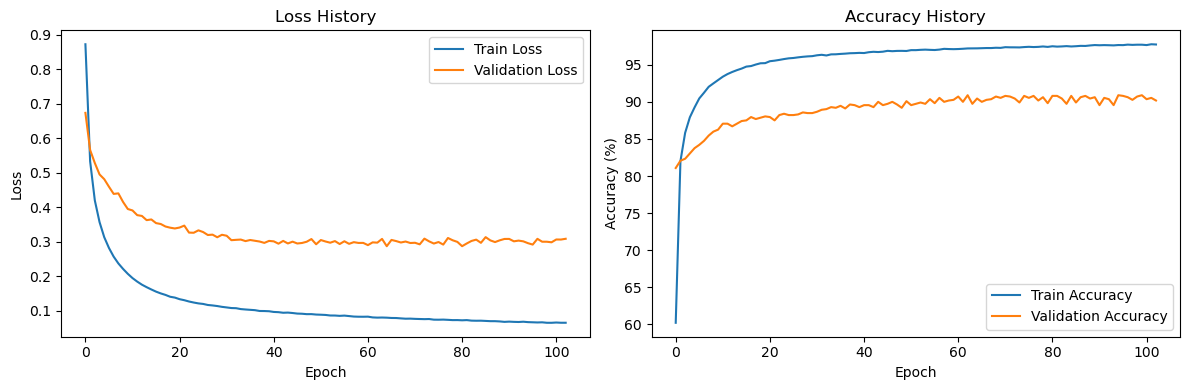

0.95
Early stopping at epoch 111


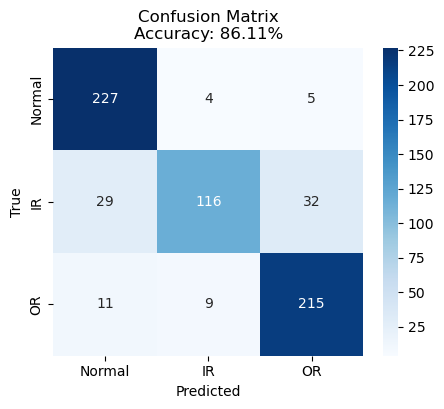

 - Model accuracy: 86.11%


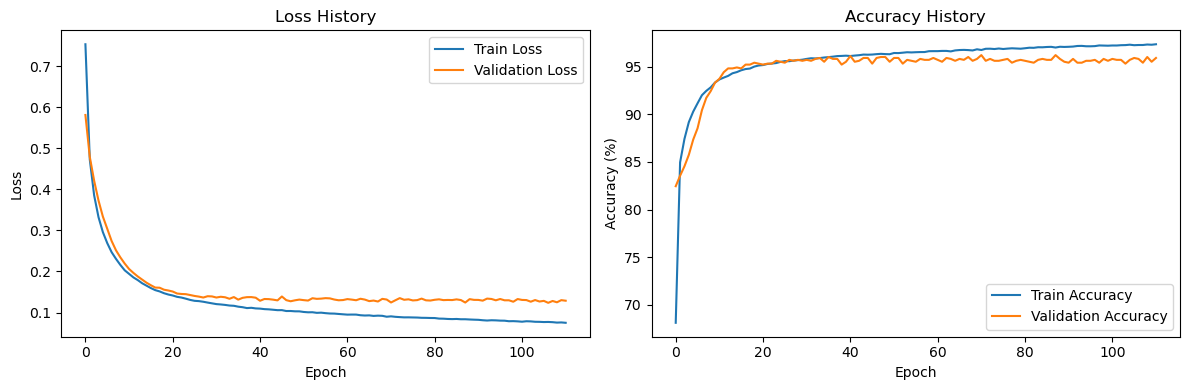

0.95
Early stopping at epoch 139


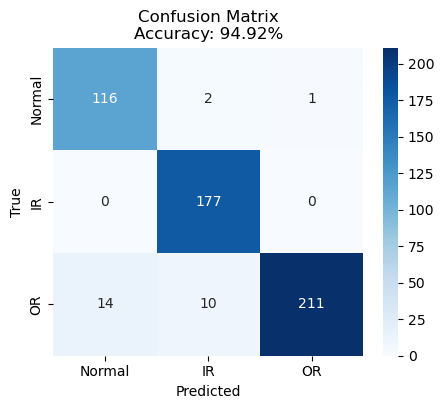

 - Model accuracy: 94.92%


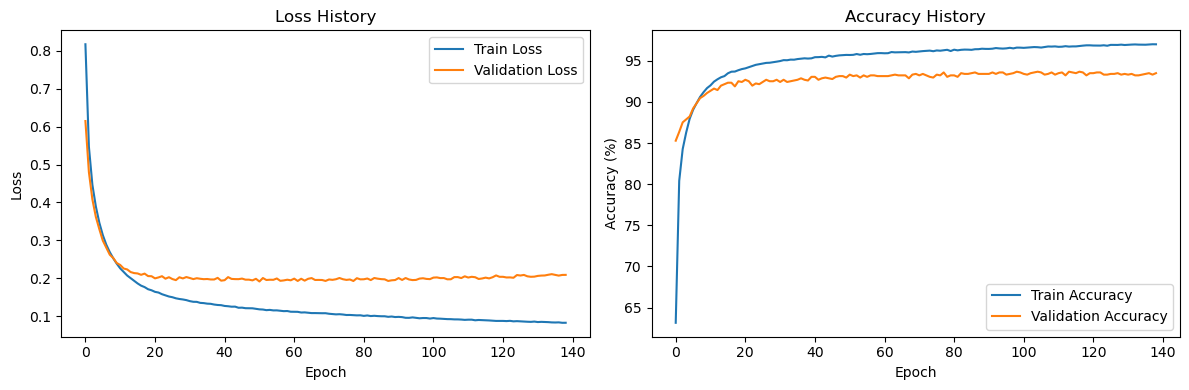

0.95
Early stopping at epoch 82


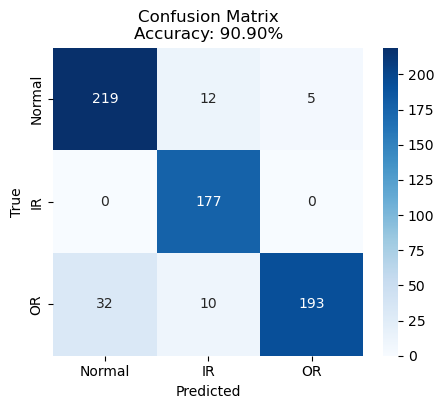

 - Model accuracy: 90.90%


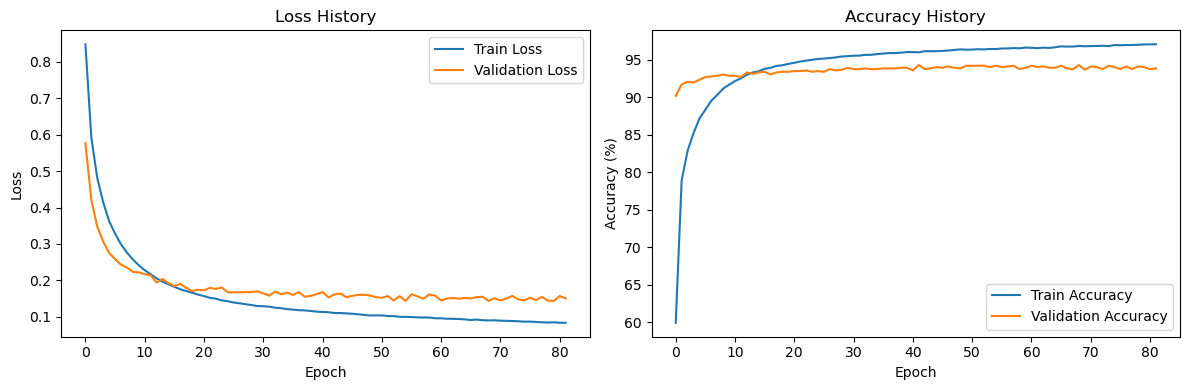

0.95
Early stopping at epoch 104


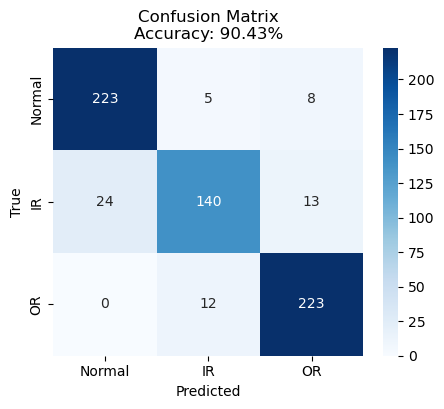

 - Model accuracy: 90.43%


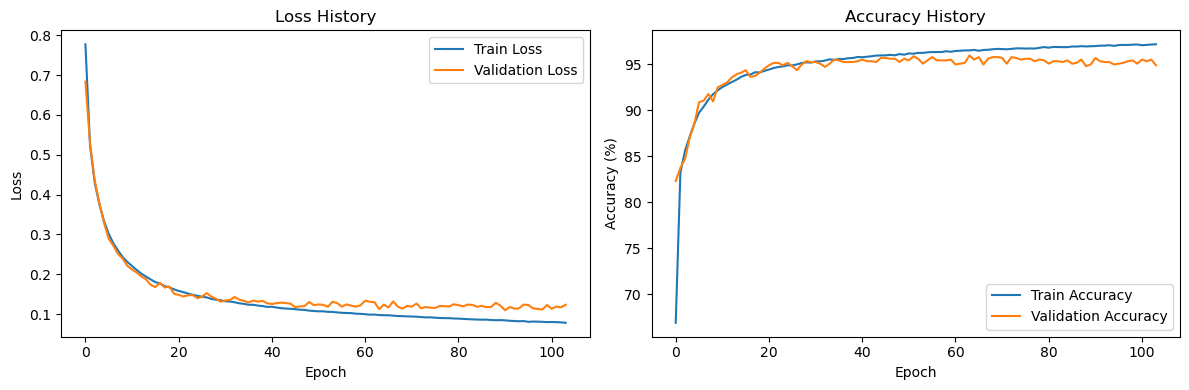

0.95
Early stopping at epoch 89


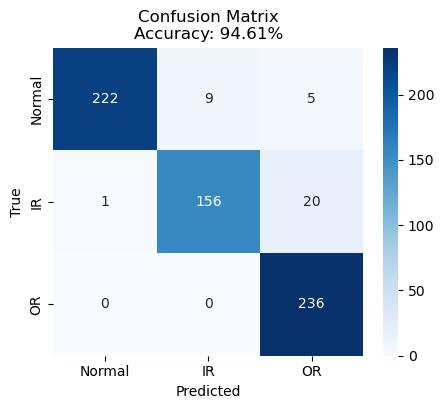

 - Model accuracy: 94.61%


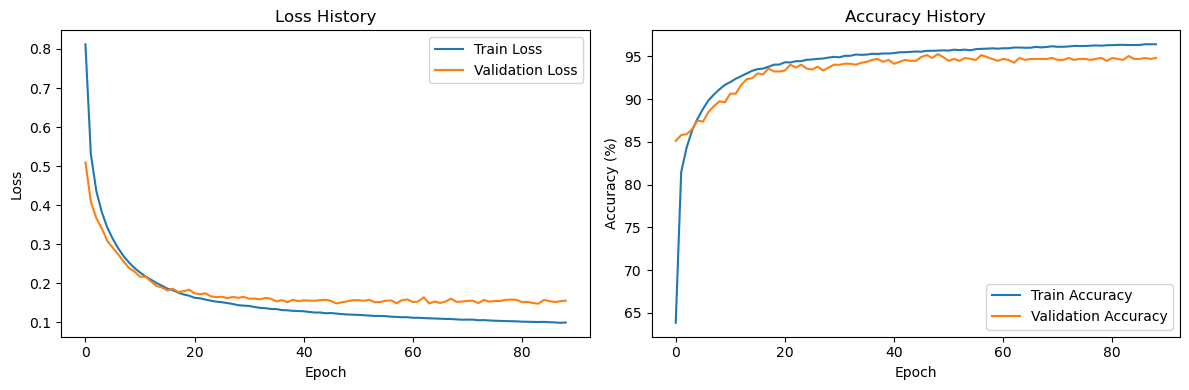

0.95
Early stopping at epoch 184


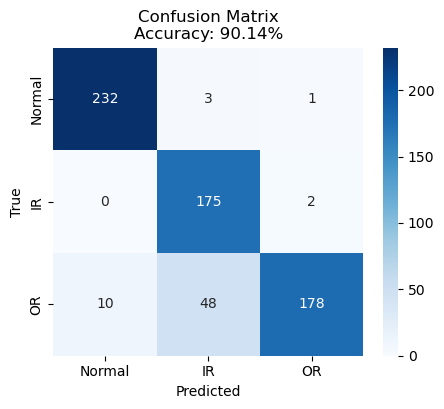

 - Model accuracy: 90.14%


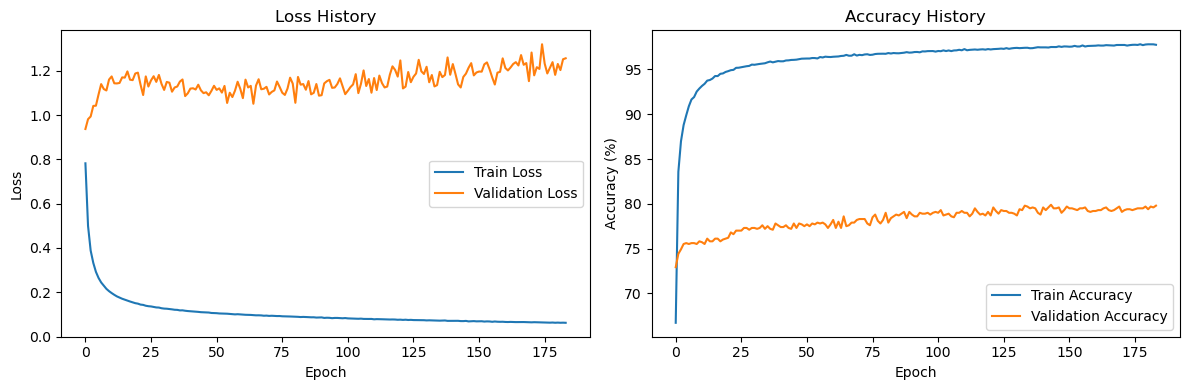

0.95
Early stopping at epoch 115


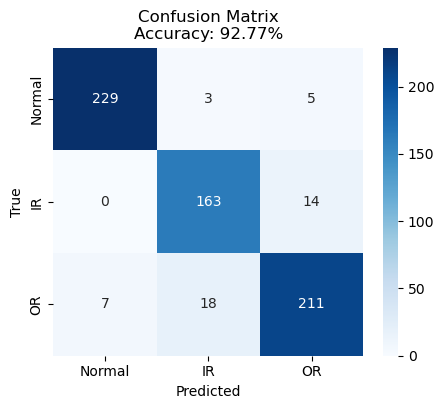

 - Model accuracy: 92.77%


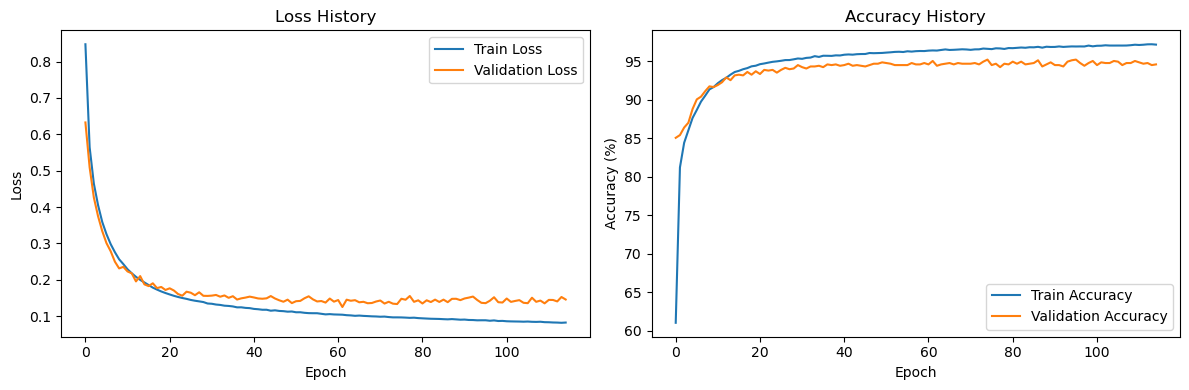

0.95
Early stopping at epoch 118


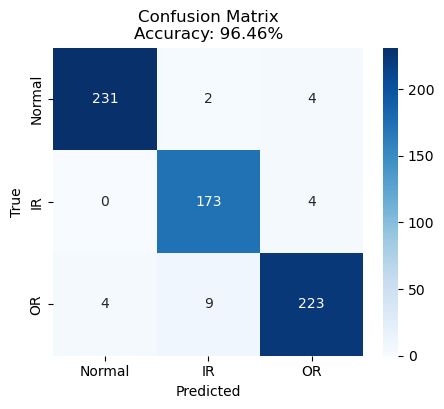

 - Model accuracy: 96.46%


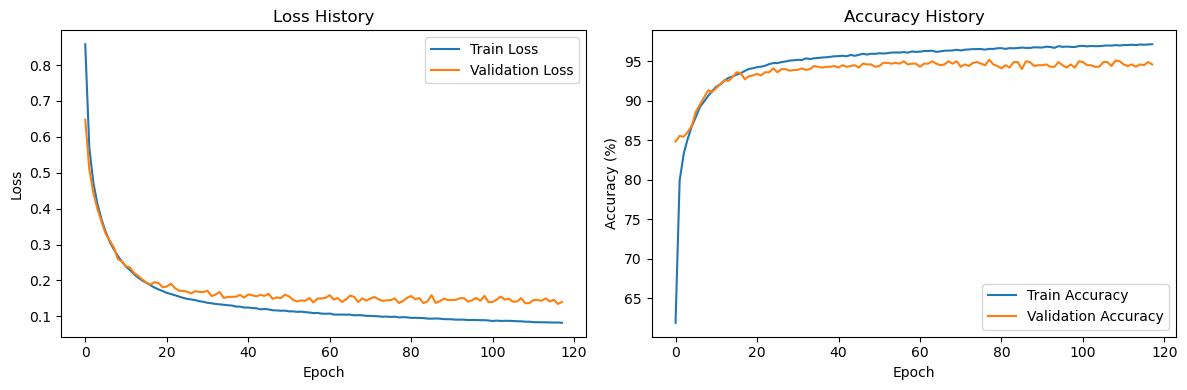

0.95
Early stopping at epoch 112


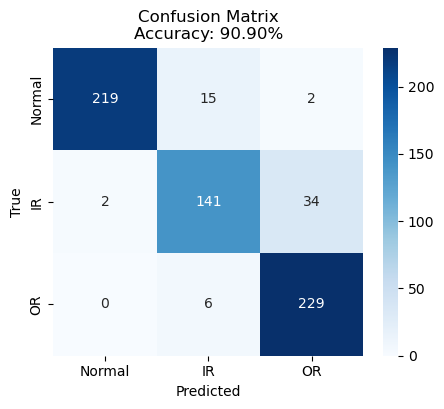

 - Model accuracy: 90.90%


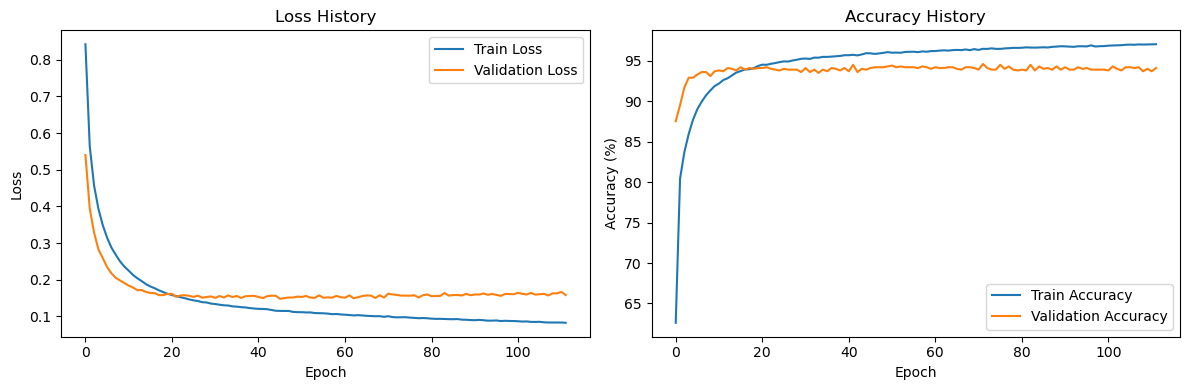

0.95
Early stopping at epoch 83


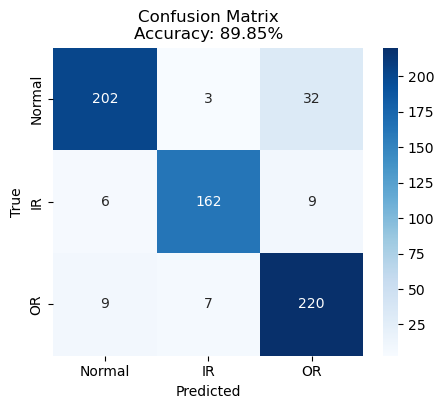

 - Model accuracy: 89.85%


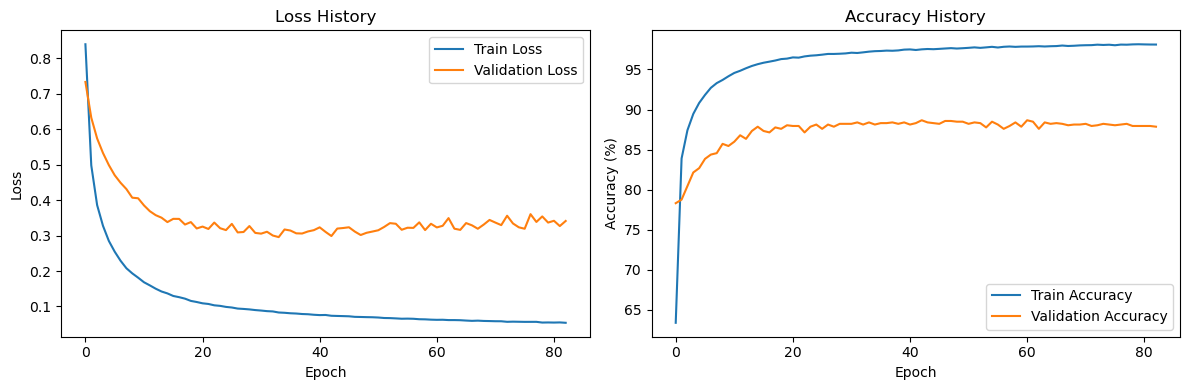

0.95
Early stopping at epoch 144


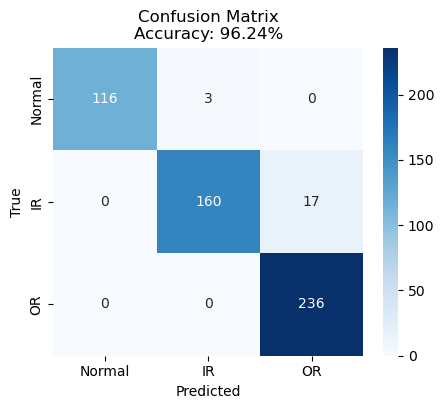

 - Model accuracy: 96.24%


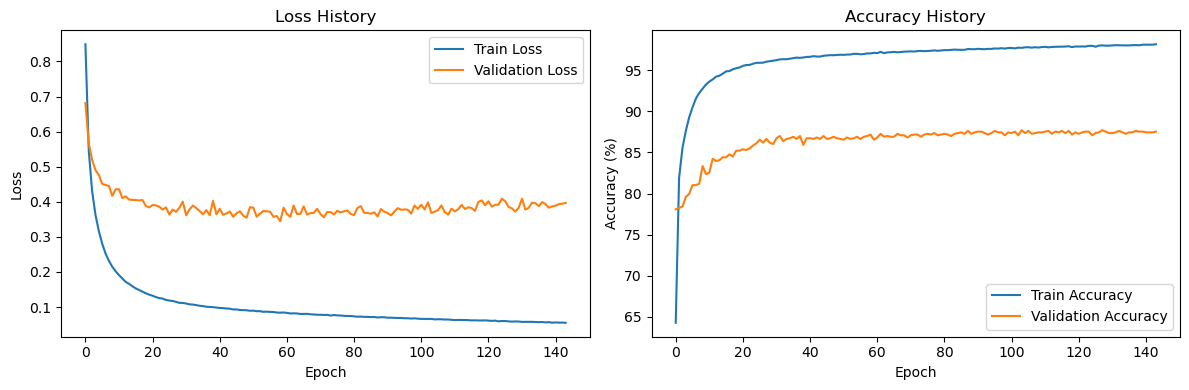

0.95
Early stopping at epoch 90


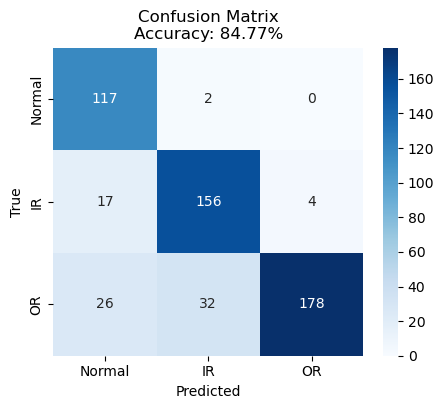

 - Model accuracy: 84.77%


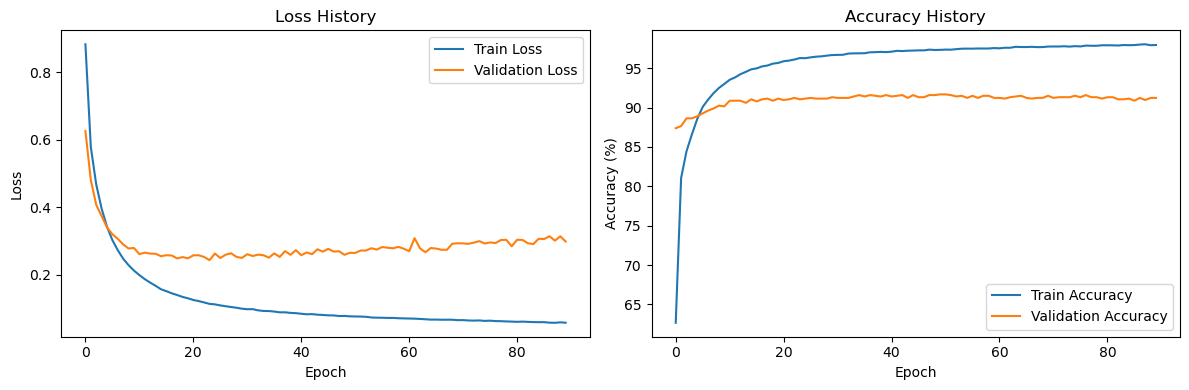

Mean accuracy: 0.9050089771084928
Std accuracy: 0.039702375900998746


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)
    X_train = X_train *1e2
    X_val = X_val *1e2
    X_test = X_test *1e2
    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))